In [11]:
#加载包
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.font_manager

from matplotlib.font_manager import _rebuild

_rebuild()

In [3]:
#读取数据源
dataframe_info = pd.read_csv("/Users/zhoujianjun/Downloads/workplace/2020-05-19/data/data.csv",encoding="utf-8")
print(dataframe_info.head())

编号   肺活量  立定跳远  800米跑  一分钟仰卧起坐    总分
0   1  3034   181    261       36  61.8
1   2  2130   183    228       32  76.7
2   3  1987   182    228       25  63.1
3   4  1723   160    225       25  64.7
4   5  2680   158    232       20  78.4


In [4]:
#获取相关系数矩阵（编号和总分不是特征，所以不做选取）
dataframe_cc = dataframe_info.iloc[:,1:-1].corr(method="pearson")
print(dataframe_cc)


肺活量      立定跳远     800米跑   一分钟仰卧起坐
肺活量      1.000000  0.152855 -0.074757  0.085807
立定跳远     0.152855  1.000000 -0.315028  0.137694
800米跑   -0.074757 -0.315028  1.000000 -0.298442
一分钟仰卧起坐  0.085807  0.137694 -0.298442  1.000000


Text(33.0, 0.5, 'kind')

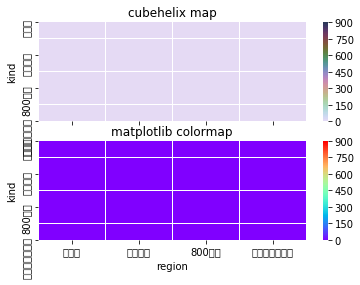

In [5]:
#相关性系数矩阵的热力图

f, (ax1,ax2) = plt.subplots(figsize = (6,4),nrows=2)
cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)
sns.heatmap(dataframe_cc, linewidths = 0.05, ax = ax1, vmax=900, vmin=0, cmap=cmap)
ax1.set_title('cubehelix map')
ax1.set_xlabel('')
ax1.set_xticklabels([]) #设置x轴图例为空值
ax1.set_ylabel('kind')

# cmap用matplotlib colormap
sns.heatmap(dataframe_cc, linewidths = 0.05, ax = ax2, vmax=900, vmin=0, cmap='rainbow') 
# rainbow为 matplotlib 的colormap名称
ax2.set_title('matplotlib colormap')
ax2.set_xlabel('region')
ax2.set_ylabel('kind')

In [6]:
#获取选项的的统计值
def function_getStatic(parm_dataframe,parm_column,parm_dict):
    """
    传入参数：parm_dataframe:要处理数据框，parm_column:要处理的列,parm_list:处理规则
    函数目的：做数值型数据分类
    """
    list_limit = list(parm_dict.keys())
    list_rule = list(map(lambda str_rule
                               :parm_column+str_rule
                               ,list(parm_dict.values())+ ["优秀"]))
    parm_dataframe["结果"] = pd.DataFrame(np.select([(parm_dataframe[parm_column]<=list_limit[0])
                                ,((parm_dataframe[parm_column]>list_limit[0])&(parm_dataframe[parm_column]<=list_limit[1]))
                                ,((parm_dataframe[parm_column]>list_limit[1])&(parm_dataframe[parm_column]<=list_limit[2]))
                                ,(parm_dataframe[parm_column]>=list_limit[2])]
                                ,list_rule))
    dataframe_result = pd.DataFrame(list(zip(parm_dataframe["编号"]
                                            ,parm_dataframe[parm_column]
                                            ,parm_dataframe["结果"])))
    dataframe_result.columns = ["编号"] + [parm_column] + [parm_column+"结果"] 
    dataframe_result = pd.DataFrame(dataframe_result.iloc[:, 0].groupby(dataframe_result.iloc[:, -1]).count())
    dataframe_result.columns = [parm_column]
    return dataframe_result

In [7]:
#利用柱状图体现统计结果
def function_getBar(parm_DataFrame,parm_filepath):
    #设置参数
    mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
    mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
    name_list = list(parm_DataFrame.index)
    num_list = list(parm_DataFrame.iloc[:, 0])
    str_titile = "".join(list(dataframe_jump.columns)) + "统计结果"
    str_file = parm_filepath + str_titile + ".jpg"
    plt.title(str_titile)
    for x, y in enumerate(num_list):
        plt.text(x
                ,y + 30, '%s' % y
                ,ha='center'
                ,va='top')
    plt.bar(range(len(num_list)), num_list, color='rgb', tick_label=name_list)
    return None

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
         立定跳远
立定跳远结果       
立定跳远不及格    93
立定跳远优秀     45
立定跳远及格    578
立定跳远良好     84


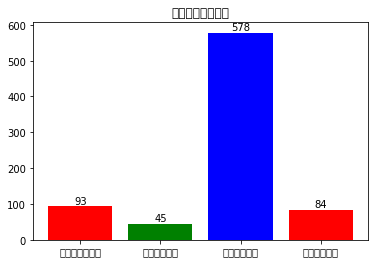

In [8]:
#立定跳远自定义 小于等于151为不及格，在151到181之间为及格，在181到195是良好，大于195为优秀
dataframe_jump = function_getStatic(dataframe_info, "立定跳远", {151:"不及格", 181:"及格", 195:"良好"})
print(dataframe_jump)
function_getBar(dataframe_jump,'/Users/zhoujianjun/Downloads/workplace/2020-05-19/image/')

肺活量
肺活量结果      
肺活量不及格  133
肺活量优秀     9
肺活量及格   614
肺活量良好    44


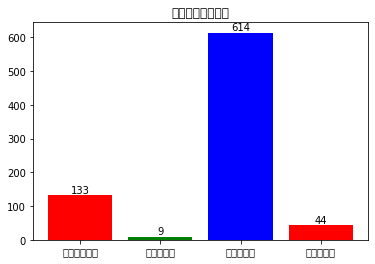

In [9]:
#肺活量自定义 小于等于2000为不及格，在2000到3000之间为及格，在3000到3500是良好，大于3500为优秀
dataframe_breath = function_getStatic(dataframe_info, "肺活量", {2000:"不及格", 3000:"及格", 3500:"良好"})
print(dataframe_breath)
function_getBar(dataframe_breath,'/Users/zhoujianjun/Downloads/workplace/2020-05-19/image/')

            一分钟仰卧起坐
一分钟仰卧起坐结果          
一分钟仰卧起坐不及格       64
一分钟仰卧起坐优秀         2
一分钟仰卧起坐及格       697
一分钟仰卧起坐良好        37


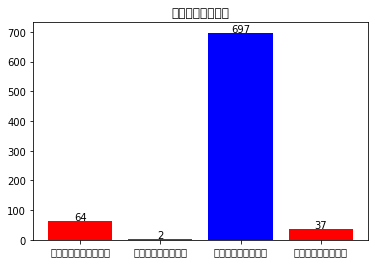

In [112]:
#一分钟仰卧起坐自定义 小于等于25为不及格，在25到45之间为及格，在45到55是良好，大于55为优秀
dataframe_abdominal = function_getStatic(dataframe_info, "一分钟仰卧起坐", {25:"不及格", 45:"及格", 55:"良好"})
print(dataframe_abdominal)
function_getBar(dataframe_abdominal,'/Users/zhoujianjun/Downloads/workplace/2020-05-19/image/')